**Names:** Tia Abraham (2205775), Bram (ID), Jacob Alderete (ID)

# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Problem 1

## Part (a)

In [2]:
# Load the data
crsp = pd.read_csv("crsp_1926_2020.zip")

# Convert column names to lowercase
crsp.columns = crsp.columns.str.lower()

# Get rid of rows with any non-numeric values
numeric_cols = [c for c in crsp.columns if c not in ['date']]
crsp[numeric_cols] = crsp[numeric_cols].apply(pd.to_numeric, errors='coerce')
crsp = crsp.dropna(subset=numeric_cols).reset_index(drop=True)

# Only include stocks that are ordinary/common shares (shrcd = 10 or 11)
crsp = crsp[crsp['shrcd'].isin([10, 11])]

# Only include stocks listed on the NYSE, AMEX, or NASDAQ (exchcd = 1, 2, 3)
crsp = crsp[crsp['exchcd'].isin([1, 2, 3])]

# Set negative prices to NA (prc < 0)
crsp.loc[crsp['prc'] < 0, 'prc'] = pd.NA

# Show the cleaned up data
crsp

,permno,date,shrcd,exchcd,prc,ret,shrout
0,10000,1986-02-28,10.0,3.0,NaN,-0.257143,3680.0
1,10000,1986-03-31,10.0,3.0,NaN,0.365385,3680.0
2,10000,1986-04-30,10.0,3.0,NaN,-0.098592,3793.0
3,10000,1986-05-30,10.0,3.0,NaN,-0.222656,3793.0
4,10000,1986-06-30,10.0,3.0,NaN,-0.005025,3793.0
...,...,...,...,...,...,...,...
4522160,93436,2020-08-31,11.0,3.0,498.32001,0.741452,931809.0
4522161,93436,2020-09-30,11.0,3.0,429.01001,-0.139087,948000.0
4522162,93436,2020-10-30,11.0,3.0,388.04001,-0.095499,947901.0
4522163,93436,2020-11-30,11.0,3.0,567.59998,0.462736,947901.0


## Part (b)

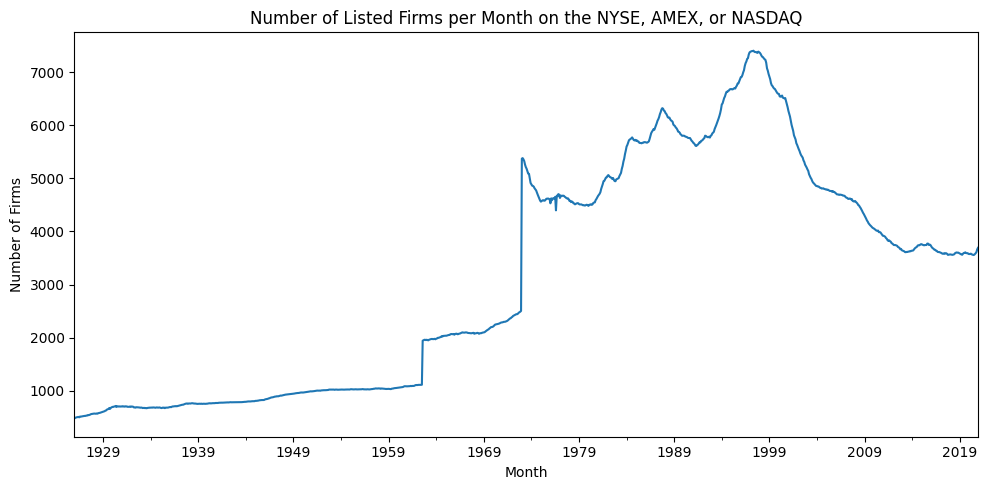

In [3]:
# Convert date to datetime and extract month
crsp['date'] = pd.to_datetime(crsp['date'], errors='coerce')
crsp['date'] = crsp['date'].dt.to_period('M')

# Count number of unique firms (permno) per month
monthly_firm_counts = crsp.groupby('date')['permno'].nunique()

# Plot
monthly_firm_counts.plot(
    title="Number of Listed Firms per Month on the NYSE, AMEX, or NASDAQ", 
                         figsize=(10, 5))
plt.xlabel("Month")
plt.ylabel("Number of Firms")
plt.tight_layout()
plt.show()